### Project Description:
### Project Tiltle: Smarter Customer Surveys: Using Machine Learning to Improve Service Quality
##### This project aims to develop a machine learning model to predict whether a customer is happy or not, using a customer happiness survey dataset from a logistics and delivery company.
##### Identify the features that most strongly influence customer happiness after receiving services, helping the company understand which aspects of their service to prioritize.
##### Apply feature selection techniques to extract a minimal set of features that maintain accuracy and improve predictability, which can guide the company in refining their survey questions for future assessments.

### Data Preprocessing.
##### The dataset may be messy and can not be used to develop a machine learning model. 
##### To find out whether it is messy or not, exploratory data anayliss(EDA) is carried out.
##### Then to make it fit for model development, it is preprocessed(transformed) based on the findings from the EDA. 

#### Import libraries

In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import StandardScaler
from scipy.stats.mstats import winsorize
from sklearn.preprocessing import PowerTransformer


#### Codes below load the dataset and display its first 5 rows.

In [8]:
file_path = r"C:\Users\USER\Documents\Happy customers\ACME-HappinessSurvey2020.csv"
df = pd.read_csv(file_path)
df.head()

,Y,X1,X2,X3,X4,X5,X6
0,0,3,3,3,4,2,4
1,0,3,2,3,5,4,3
2,1,5,3,3,3,3,5
3,0,5,4,3,3,3,5
4,0,5,4,3,3,3,5


#### From the result above, the dataset is a suppervised data and meant to predict a class. So, a classification model will be developed.

##### Codes below display the structure of the dataset.

In [10]:
print(df.shape)

(126, 7)


#### From the result above, the dataset has 126 rows and 7 columns.

#### Exploratory Data Analysis(EDA)

##### Codes below examine and display the  data type of the variables.

In [14]:
print( " These are the data types of the variables:")
df.dtypes

 These are the data types of the variables:


Y     int64
X1    int64
X2    int64
X3    int64
X4    int64
X5    int64
X6    int64
dtype: object

#### From the result above, the variables are integers(whole numbers). To prevent loss of imformation and data type mismatch during data transformatiom,convert the data type to float.

##### Codes below convert the data type to float(decimal numbers)

In [50]:
# Get all integer columns
int_cols = df.select_dtypes(include=["int"]).columns

# Convert them to float64
df[int_cols] = df[int_cols].astype("float64")

# Verify changes
print(df.dtypes)

Y     float64
X1    float64
X2    float64
X3    float64
X4    float64
X5    float64
X6    float64
dtype: object


#### From the result above, the data type of the variables has been converted to float(decimal numbers)

##### Codes below examine the dataset for completely empty rows

In [20]:
# Check if there is a copletely empty rows in the dataset

completely_empty_rows = df[df.isnull( ).all(axis = 1)]
if not completely_empty_rows.empty:
    print("Number of completely empty rows:{len(completely_empty_rows)}")
else:
    print("No row is completely empty")

No row is completely empty


#### From the result above, the dataset has no completly empty row.

##### Codes below examine the dataset for duplicated rows

In [13]:
duplicated_rows = df[df.duplicated( )]
if not duplicated_rows.empty:
    print(f"Number of duplicated rows:{len(duplicated_rows)}")
    print("Duplicated rows are:")
    print(duplicated_rows)
else:
    print("There is no duplicate rows:")

Number of duplicated rows:16
Duplicated rows are:
       Y   X1   X2   X3   X4   X5   X6
4    0.0  5.0  4.0  3.0  3.0  3.0  5.0
22   0.0  4.0  3.0  5.0  5.0  5.0  4.0
28   1.0  3.0  3.0  1.0  3.0  3.0  4.0
33   1.0  3.0  2.0  4.0  4.0  4.0  5.0
37   1.0  5.0  3.0  4.0  3.0  4.0  5.0
50   1.0  5.0  1.0  3.0  3.0  4.0  4.0
51   1.0  5.0  1.0  3.0  3.0  4.0  4.0
53   1.0  5.0  2.0  4.0  3.0  4.0  5.0
55   1.0  4.0  3.0  2.0  4.0  3.0  4.0
62   1.0  5.0  2.0  4.0  4.0  5.0  5.0
65   1.0  4.0  1.0  3.0  4.0  4.0  4.0
93   1.0  5.0  4.0  4.0  4.0  4.0  5.0
95   1.0  5.0  5.0  5.0  5.0  5.0  5.0
107  0.0  4.0  2.0  4.0  4.0  4.0  4.0
117  1.0  5.0  1.0  5.0  5.0  5.0  5.0
123  1.0  5.0  3.0  3.0  4.0  4.0  5.0


#### From the result above, the dataset has 16 duplictated rows.

##### Codes below  drop the duplicated rows.

In [52]:
df = df.drop_duplicates()

# Reset index 
df = df.reset_index(drop=True)

# Check result
print(f"Number of rows after dropping duplicates: {len(df)}")

Number of rows after dropping duplicates: 110


#### From the result above, the rows reduced from 126 to 110 after dropping the duplicated rows.

### COLUMN BY COLUMN ANALYSIS

### X1 column analysis

##### Codes below examine X1 column for missing values.

In [28]:
df["X1"].isna().sum()

np.int64(0)

#### From the result above, X1 has no missing values.

##### Codes below examine X1 column for the following:
##### statastics.
##### presence of outliers
##### skewness and kurtosis
##### its distribution using box plot and histogram.

Statistics for 'X1' column:
count    110.0000
mean       4.3091
std        0.8099
min        1.0000
25%        4.0000
50%        4.5000
75%        5.0000
max        5.0000
Name: X1, dtype: float64

Skewness of 'X1': -1.0474
Kurtosis of 'X1': 1.0985

Number of Outliers: 1
Percentage of Outliers: 0.91%


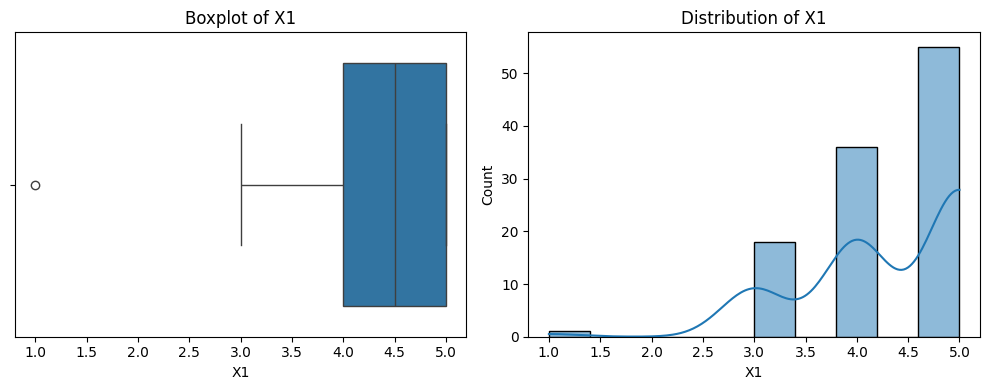

In [54]:
# Summary statistics for X1 (rounded to 4 decimal places)
X1_stats = df['X1'].describe().round(4)
skewness = round(df['X1'].skew(), 4)
kurtosis = round(df['X1'].kurtosis(), 4)

print("Statistics for 'X1' column:")
print(X1_stats)
print(f"\nSkewness of 'X1': {skewness}")
print(f"Kurtosis of 'X1': {kurtosis}")

# Calculate Q1 (25th percentile) and Q3 (75th percentile)
Q1 = df['X1'].quantile(0.25)
Q3 = df['X1'].quantile(0.75)
IQR = Q3 - Q1

# Determine outlier boundaries
lower_bound = Q1 - 1.5 * IQR
upper_bound = Q3 + 1.5 * IQR

# Identify outliers in X1
outliers = df[(df['X1'] < lower_bound) | (df['X1'] > upper_bound)]

# Calculate the number and percentage of outliers
number_outliers = len(outliers)
percentage_outliers = (len(outliers) / len(df)) * 100

# Print number and percentage of outliers
print(f"\nNumber of Outliers: {number_outliers}")
print(f"Percentage of Outliers: {percentage_outliers:.2f}%")

# Set up side-by-side plots
fig, axes = plt.subplots(1, 2, figsize=(10, 4))

# Boxplot for 'X1' column
sns.boxplot(x=df['X1'], ax=axes[0])
axes[0].set_title("Boxplot of X1")

# Histogram for 'X1' column
sns.histplot(df['X1'], kde=True, ax=axes[1])
axes[1].set_title("Distribution of X1")

plt.tight_layout()
plt.show()

#### From the results above, X1 has 110 data points which ranges from 1 to 5  where  25% is 4, 50% is 4.5 and 75% is 5. It is Negatively skewed, it has 1 outlier and has mean and standard deviation values of 4.3091 and 0.8099 respectively.

##### Codes below transform X1 (reduce its skewedness)  using Yeo-Johnson's transformation method.

In [56]:
# Initialize Yeo-Johnson transformer
pt = PowerTransformer(method='yeo-johnson', standardize=False)

# Fit and transform only X1 column
df['X1'] = pt.fit_transform(df[['X1']]) 

##### Codes below examine the effect of Yeo-Johnson's transformation method on X1.

Statistics for 'X1' column:
count    110.0000
mean     154.1120
std       69.8000
min        3.3180
25%      110.8995
50%      165.3990
75%      219.8985
max      219.8985
Name: X1, dtype: float64

Skewness of 'X1': -0.3364
Kurtosis of 'X1': -1.4658

Number of Outliers: 0
Percentage of Outliers: 0.00%


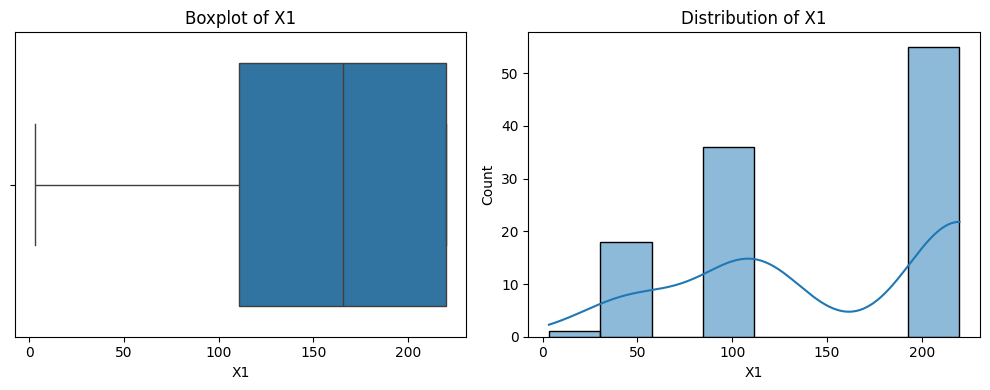

In [58]:
# Summary statistics for X1 (rounded to 4 decimal places)
X1_stats = df['X1'].describe().round(4)
skewness = round(df['X1'].skew(), 4)
kurtosis = round(df['X1'].kurtosis(), 4)

print("Statistics for 'X1' column:")
print(X1_stats)
print(f"\nSkewness of 'X1': {skewness}")
print(f"Kurtosis of 'X1': {kurtosis}")

# Calculate Q1 (25th percentile) and Q3 (75th percentile)
Q1 = df['X1'].quantile(0.25)
Q3 = df['X1'].quantile(0.75)
IQR = Q3 - Q1

# Determine outlier boundaries
lower_bound = Q1 - 1.5 * IQR
upper_bound = Q3 + 1.5 * IQR

# Identify outliers in X1
outliers = df[(df['X1'] < lower_bound) | (df['X1'] > upper_bound)]

# Calculate the number and percentage of outliers
number_outliers = len(outliers)
percentage_outliers = (len(outliers) / len(df)) * 100

# Print number and percentage of outliers
print(f"\nNumber of Outliers: {number_outliers}")
print(f"Percentage of Outliers: {percentage_outliers:.2f}%")

# Set up side-by-side plots
fig, axes = plt.subplots(1, 2, figsize=(10, 4))

# Boxplot for 'X1' column
sns.boxplot(x=df['X1'], ax=axes[0])
axes[0].set_title("Boxplot of X1")

# Histogram for 'X1' column
sns.histplot(df['X1'], kde=True, ax=axes[1])
axes[1].set_title("Distribution of X1")

plt.tight_layout()
plt.show()

#### From the result above, X1 skeweness has reduced from -1.0474 to - 0.3364(normally distributed) and the outlier has been handled as well.

##### Codes below Standardize X1 Column using z-score method.

In [25]:
scaler = StandardScaler()

# Standardize X1 in place
df['X1'] = scaler.fit_transform(df[['X1']])

##### Codes below display X1 statistics again  after standardization.

In [27]:
X1_stats = df['X1'].describe().round(4)

print("Statistics for 'X1' column:")
print(X1_stats)

Statistics for 'X1' column:
count    110.0000
mean      -0.0000
std        1.0046
min       -4.1047
25%       -0.3834
50%        0.2368
75%        0.8570
max        0.8570
Name: X1, dtype: float64


#### From the result above, the mean value has been set to -0 and and standard deviation to 1 as expected.

### X2 Column analysis

##### Codes below examine X2 column for missing values.

In [47]:

df["X2"].isna().sum()

np.int64(0)

#### From the result above, X2 has no missing value.

##### Codes below Examine X2 for the following:
##### statistics
##### presence of outliers
##### skewness and kurtosis.
##### its distribution using box plot and histogram.

Statistics for 'X2' column:
count    110.0000
mean       2.5364
std        1.1061
min        1.0000
25%        2.0000
50%        3.0000
75%        3.0000
max        5.0000
Name: X2, dtype: float64

Skewness of 'X2': 0.2586
Kurtosis of 'X2': -0.5886

Number of Outliers: 5
Percentage of Outliers: 4.55%


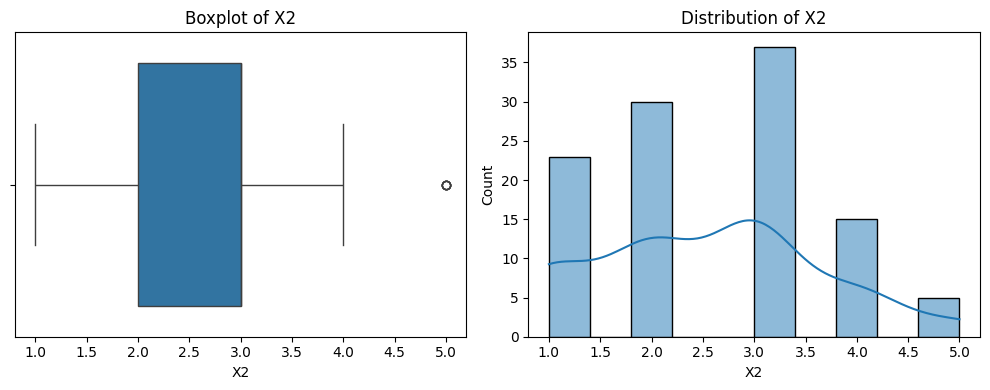

In [49]:
# Summary statistics for X2 (rounded to 4 decimal places)
X2_stats = df['X2'].describe().round(4)
skewness = round(df['X2'].skew(), 4)
kurtosis = round(df['X2'].kurtosis(), 4)

print("Statistics for 'X2' column:")
print(X2_stats)
print(f"\nSkewness of 'X2': {skewness}")
print(f"Kurtosis of 'X2': {kurtosis}")

# Calculate Q1 (25th percentile) and Q3 (75th percentile)
Q1 = df['X2'].quantile(0.25)
Q3 = df['X2'].quantile(0.75)
IQR = Q3 - Q1

# Determine outlier boundaries
lower_bound = Q1 - 1.5 * IQR
upper_bound = Q3 + 1.5 * IQR

# Identify outliers in X2
outliers = df[(df['X2'] < lower_bound) | (df['X2'] > upper_bound)]

# Calculate the number and percentage of outliers
number_outliers = len(outliers)
percentage_outliers = (len(outliers) / len(df)) * 100

# Print number and percentage of outliers
print(f"\nNumber of Outliers: {number_outliers}")
print(f"Percentage of Outliers: {percentage_outliers:.2f}%")

# Set up side-by-side plots
fig, axes = plt.subplots(1, 2, figsize=(10, 4))

# Boxplot for 'X2' column
sns.boxplot(x=df['X2'], ax=axes[0])
axes[0].set_title("Boxplot of X2")

# Histogram for 'X2' column
sns.histplot(df['X2'], kde=True, ax=axes[1])
axes[1].set_title("Distribution of X2")

plt.tight_layout()
plt.show()

#### From the results above, X2 has 110 data points which ranges from 1 to 5 where 25% is 2, 50%/75% is 3. It is normally distributed, it has 5 outliers, it has mean and standard deviation values of 2.5364 and 1.1061 respectively.

##### Codes below handle the outliers using winsorization method.

In [7]:
df['X2'] = winsorize(df['X2'], limits=[0.05, 0.05]).data

##### Codes below examine the effect of the wisorization on X2 

Statistics for 'X2' column:
count    110.0000
mean       2.4909
std        1.0204
min        1.0000
25%        2.0000
50%        3.0000
75%        3.0000
max        4.0000
Name: X2, dtype: float64

Skewness of 'X2': -0.0541
Kurtosis of 'X2': -1.103

Number of Outliers: 0
Percentage of Outliers: 0.00%


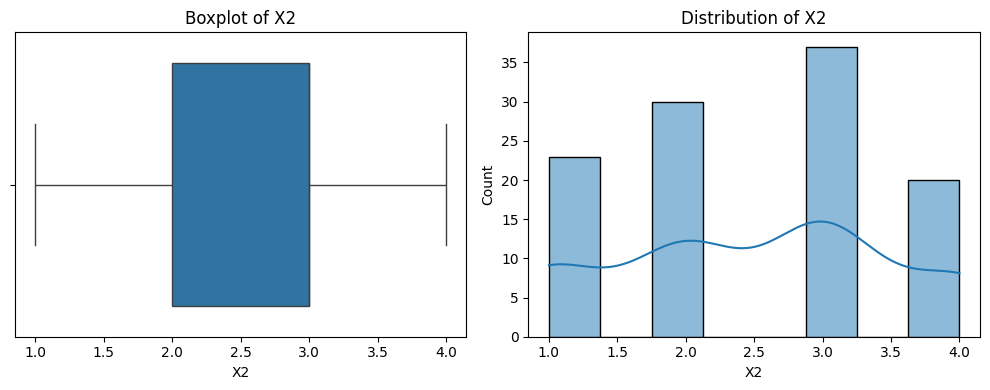

In [9]:
# Summary statistics for X2 (rounded to 4 decimal places)
X2_stats = df['X2'].describe().round(4)
skewness = round(df['X2'].skew(), 4)
kurtosis = round(df['X2'].kurtosis(), 4)

print("Statistics for 'X2' column:")
print(X2_stats)
print(f"\nSkewness of 'X2': {skewness}")
print(f"Kurtosis of 'X2': {kurtosis}")

# Calculate Q1 (25th percentile) and Q3 (75th percentile)
Q1 = df['X2'].quantile(0.25)
Q3 = df['X2'].quantile(0.75)
IQR = Q3 - Q1

# Determine outlier boundaries
lower_bound = Q1 - 1.5 * IQR
upper_bound = Q3 + 1.5 * IQR

# Identify outliers in X2
outliers = df[(df['X2'] < lower_bound) | (df['X2'] > upper_bound)]

# Calculate the number and percentage of outliers
number_outliers = len(outliers)
percentage_outliers = (len(outliers) / len(df)) * 100

# Print number and percentage of outliers
print(f"\nNumber of Outliers: {number_outliers}")
print(f"Percentage of Outliers: {percentage_outliers:.2f}%")

# Set up side-by-side plots
fig, axes = plt.subplots(1, 2, figsize=(10, 4))

# Boxplot for 'X2' column
sns.boxplot(x=df['X2'], ax=axes[0])
axes[0].set_title("Boxplot of X2")

# Histogram for 'X2' column
sns.histplot(df['X2'], kde=True, ax=axes[1])
axes[1].set_title("Distribution of X2")

plt.tight_layout()
plt.show()

#### From the result above, the outliers has been reduced from 5 to 0( no more outliers) after winsorization.

##### Codes below standardize X2 column using z-score method.

In [59]:
scaler = StandardScaler()

# Standardize X2 in place
df['X2'] = scaler.fit_transform(df[['X2']])

##### Codes below display X2 statistics againg after standardization.

In [61]:
X2_stats = df['X2'].describe().round(4)

print("Statistics for 'X2' column:")
print(X2_stats)

Statistics for 'X2' column:
count    110.0000
mean       0.0000
std        1.0046
min       -1.4678
25%       -0.4833
50%        0.5012
75%        0.5012
max        1.4857
Name: X2, dtype: float64


#### From the result above, the mean and the standarded deviation values have been set to 0 and 1 respectively as expected.

### X3 column analysis

##### Codes below examine X3 column for missing values

In [13]:
df["X3"].isna().sum()

np.int64(0)

#### From the result above, X3 has no missing values.

##### Codes below examine X3 for the following:
##### statistics
##### presence of outliers
##### skewness and kurtosis.
##### its distribution using box plot and histogram.

Statistics for 'X3' column:
count    110.0000
mean       3.2727
std        1.0128
min        1.0000
25%        3.0000
50%        3.0000
75%        4.0000
max        5.0000
Name: X3, dtype: float64

Skewness of 'X3': -0.1414
Kurtosis of 'X3': -0.0757

Number of Outliers: 6
Percentage of Outliers: 5.45%


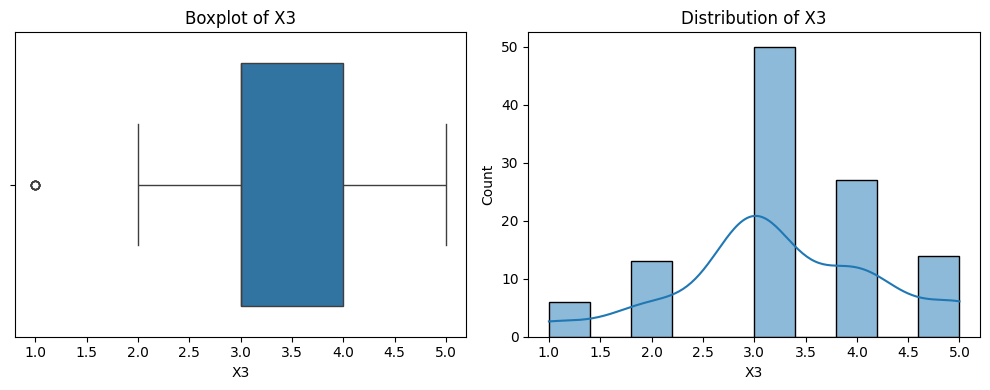

In [31]:
# Summary statistics for X3 (rounded to 4 decimal places)
X3_stats = df['X3'].describe().round(4)
skewness = round(df['X3'].skew(), 4)
kurtosis = round(df['X3'].kurtosis(), 4)

print("Statistics for 'X3' column:")
print(X3_stats)
print(f"\nSkewness of 'X3': {skewness}")
print(f"Kurtosis of 'X3': {kurtosis}")

# Calculate Q1 (25th percentile) and Q3 (75th percentile)
Q1 = df['X3'].quantile(0.25)
Q3 = df['X3'].quantile(0.75)
IQR = Q3 - Q1

# Determine outlier boundaries
lower_bound = Q1 - 1.5 * IQR
upper_bound = Q3 + 1.5 * IQR

# Identify outliers in X3
outliers = df[(df['X3'] < lower_bound) | (df['X3'] > upper_bound)]

# Calculate the number and percentage of outliers
number_outliers = len(outliers)
percentage_outliers = (len(outliers) / len(df)) * 100

# Print number and percentage of outliers
print(f"\nNumber of Outliers: {number_outliers}")
print(f"Percentage of Outliers: {percentage_outliers:.2f}%")

# Set up side-by-side plots
fig, axes = plt.subplots(1, 2, figsize=(10, 4))

# Boxplot for 'X3' column
sns.boxplot(x=df['X3'], ax=axes[0])
axes[0].set_title("Boxplot of X3")

# Histogram for 'X3' column
sns.histplot(df['X3'], kde=True, ax=axes[1])
axes[1].set_title("Distribution of X3")

plt.tight_layout()
plt.show()

#### From the results  above, X3 has 110 data points which ranges from 1 to 5 where 25%/50% is 3 and 75% is 4. It is normally distributed, has 6 outliers, mean and standard deviation value of 3.2727 and 1,0128 respectively.

##### Codes below Handle outliers in X3  using winsorization method.

In [11]:
df['X3'] = winsorize(df['X3'], limits=[0.10, 0.10]).data

##### Codes below examine the effect of winsorization on X3.

Statistics for 'X3' column:
count    110.0000
mean       3.3273
std        0.9098
min        2.0000
25%        3.0000
50%        3.0000
75%        4.0000
max        5.0000
Name: X3, dtype: float64

Skewness of 'X3': 0.3421
Kurtosis of 'X3': -0.6128

Number of Outliers: 0
Percentage of Outliers: 0.00%


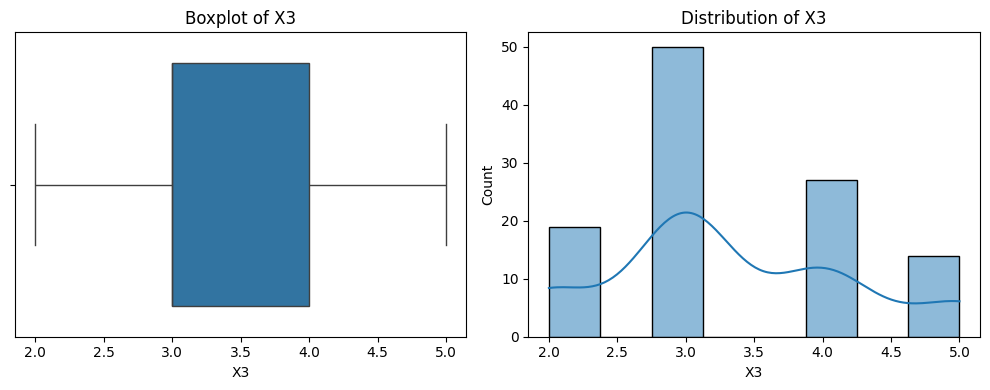

In [13]:
# Summary statistics for X3 (rounded to 4 decimal places)
X3_stats = df['X3'].describe().round(4)
skewness = round(df['X3'].skew(), 4)
kurtosis = round(df['X3'].kurtosis(), 4)

print("Statistics for 'X3' column:")
print(X3_stats)
print(f"\nSkewness of 'X3': {skewness}")
print(f"Kurtosis of 'X3': {kurtosis}")

# Calculate Q1 (25th percentile) and Q3 (75th percentile)
Q1 = df['X3'].quantile(0.25)
Q3 = df['X3'].quantile(0.75)
IQR = Q3 - Q1

# Determine outlier boundaries
lower_bound = Q1 - 1.5 * IQR
upper_bound = Q3 + 1.5 * IQR

# Identify outliers in X3
outliers = df[(df['X3'] < lower_bound) | (df['X3'] > upper_bound)]

# Calculate the number and percentage of outliers
number_outliers = len(outliers)
percentage_outliers = (len(outliers) / len(df)) * 100

# Print number and percentage of outliers
print(f"\nNumber of Outliers: {number_outliers}")
print(f"Percentage of Outliers: {percentage_outliers:.2f}%")

# Set up side-by-side plots
fig, axes = plt.subplots(1, 2, figsize=(10, 4))

# Boxplot for 'X3' column
sns.boxplot(x=df['X3'], ax=axes[0])
axes[0].set_title("Boxplot of X3")

# Histogram for 'X3' column
sns.histplot(df['X3'], kde=True, ax=axes[1])
axes[1].set_title("Distribution of X3")

plt.tight_layout()
plt.show()

#### From the result above, the outliers reduced from 6 to 0(no more outliers) after winsorization.

##### Codes below standardize X3 using z-score method.

In [73]:
scaler = StandardScaler()

# Standardize X2 in place
df['X3'] = scaler.fit_transform(df[['X3']])


##### Codes below examine X3 statistics again after standardization.

In [75]:
X3_stats = df['X3'].describe().round(4)

print("Statistics for 'X3' column:")
print(X3_stats)

Statistics for 'X3' column:
count    110.0000
mean       0.0000
std        1.0046
min       -1.4678
25%       -0.4833
50%        0.5012
75%        0.5012
max        1.4857
Name: X2, dtype: float64


#### From the result above, the mean and the standard deviation values of X3 have been set to 0 and 1 repectively as expected.

### Column X4 analysis.

##### Codes below examine X4 column for missing values.

In [15]:
df["X4"].isna().sum()

np.int64(0)

#### From the result above, X4 has no missing values.

##### Codes below examine X4 for the following:
##### statistics
##### presence of outliers
##### skewness and kurtosis.
##### its distribution using box plot and histogram.

Statistics for 'X4' column:
count    110.0000
mean       3.7364
std        0.8952
min        1.0000
25%        3.0000
50%        4.0000
75%        4.0000
max        5.0000
Name: X4, dtype: float64

Skewness of 'X4': -0.4675
Kurtosis of 'X4': 0.2992

Number of Outliers: 2
Percentage of Outliers: 1.82%


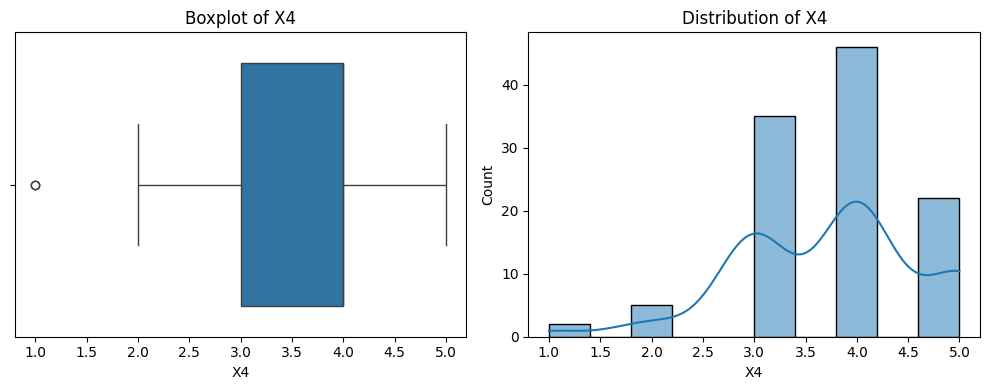

In [17]:
# Summary statistics for X4 (rounded to 4 decimal places)
X4_stats = df['X4'].describe().round(4)
skewness = round(df['X4'].skew(), 4)
kurtosis = round(df['X4'].kurtosis(), 4)

print("Statistics for 'X4' column:")
print(X4_stats)
print(f"\nSkewness of 'X4': {skewness}")
print(f"Kurtosis of 'X4': {kurtosis}")

# Calculate Q1 (25th percentile) and Q3 (75th percentile)
Q1 = df['X4'].quantile(0.25)
Q3 = df['X4'].quantile(0.75)
IQR = Q3 - Q1

# Determine outlier boundaries
lower_bound = Q1 - 1.5 * IQR
upper_bound = Q3 + 1.5 * IQR

# Identify outliers in X4
outliers = df[(df['X4'] < lower_bound) | (df['X4'] > upper_bound)]

# Calculate the number and percentage of outliers
number_outliers = len(outliers)
percentage_outliers = (len(outliers) / len(df)) * 100

# Print number and percentage of outliers
print(f"\nNumber of Outliers: {number_outliers}")
print(f"Percentage of Outliers: {percentage_outliers:.2f}%")

# Set up side-by-side plots
fig, axes = plt.subplots(1, 2, figsize=(10, 4))

# Boxplot for 'X4' column
sns.boxplot(x=df['X4'], ax=axes[0])
axes[0].set_title("Boxplot of X4")

# Histogram for 'X4' column
sns.histplot(df['X4'], kde=True, ax=axes[1])
axes[1].set_title("Distribution of X4")

plt.tight_layout()
plt.show()

#### From the results above, X4 has 110 data points which ranges from 1 to 5 where 25% is 3 and 50%/75% is 3. It is approximately normally distributed, it has 2 outliers, mean and standard deviation values of 3.7364 and 0.8952 respectively.

##### Codes below handle outliers in X4  using winsorization method.

In [15]:
df['X4'] = winsorize(df['X4'], limits=[0.05, 0.05]).data

##### Codes below examine the effect of the wisorization on X4

Statistics for 'X4' column:
count    110.0000
mean       3.7545
std        0.8479
min        2.0000
25%        3.0000
50%        4.0000
75%        4.0000
max        5.0000
Name: X4, dtype: float64

Skewness of 'X4': -0.1481
Kurtosis of 'X4': -0.6322

Number of Outliers: 0
Percentage of Outliers: 0.00%


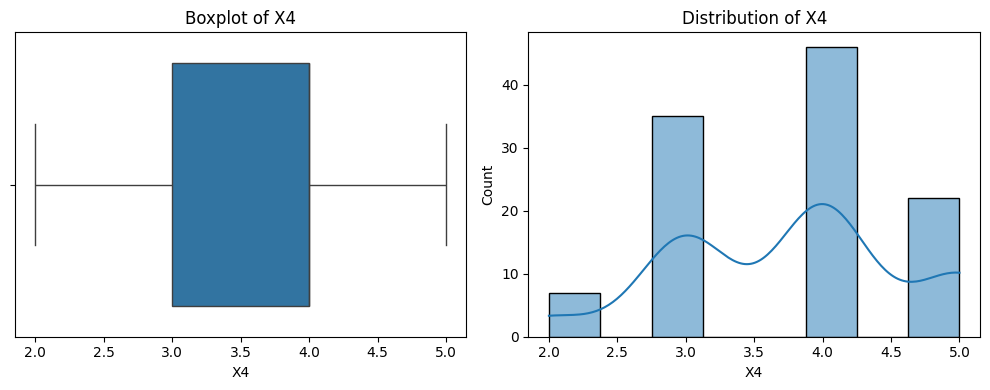

In [17]:
# Summary statistics for X4 (rounded to 4 decimal places)
X4_stats = df['X4'].describe().round(4)
skewness = round(df['X4'].skew(), 4)
kurtosis = round(df['X4'].kurtosis(), 4)

print("Statistics for 'X4' column:")
print(X4_stats)
print(f"\nSkewness of 'X4': {skewness}")
print(f"Kurtosis of 'X4': {kurtosis}")

# Calculate Q1 (25th percentile) and Q3 (75th percentile)
Q1 = df['X4'].quantile(0.25)
Q3 = df['X4'].quantile(0.75)
IQR = Q3 - Q1

# Determine outlier boundaries
lower_bound = Q1 - 1.5 * IQR
upper_bound = Q3 + 1.5 * IQR

# Identify outliers in X4
outliers = df[(df['X4'] < lower_bound) | (df['X4'] > upper_bound)]

# Calculate the number and percentage of outliers
number_outliers = len(outliers)
percentage_outliers = (len(outliers) / len(df)) * 100

# Print number and percentage of outliers
print(f"\nNumber of Outliers: {number_outliers}")
print(f"Percentage of Outliers: {percentage_outliers:.2f}%")

# Set up side-by-side plots
fig, axes = plt.subplots(1, 2, figsize=(10, 4))

# Boxplot for 'X4' column
sns.boxplot(x=df['X4'], ax=axes[0])
axes[0].set_title("Boxplot of X4")

# Histogram for 'X4' column
sns.histplot(df['X4'], kde=True, ax=axes[1])
axes[1].set_title("Distribution of X4")

plt.tight_layout()
plt.show()

#### From the result above, the outliers reduced from 2 to 0 (no more outliers) after winsorization.

##### Codes below standardize X4 using z-score

In [27]:
scaler = StandardScaler()

# Standardize X4 in place
df['X4'] = scaler.fit_transform(df[['X4']])

##### Codes below examine the effect of standardization on X4.

In [29]:
X4_stats = df['X4'].describe().round(4)

print("Statistics for 'X4' column:")
print(X4_stats)

Statistics for 'X4' column:
count    110.0000
mean       0.0000
std        1.0046
min       -2.0786
25%       -0.8939
50%        0.2908
75%        0.2908
max        1.4755
Name: X4, dtype: float64


#### From the result above, the mean and standard deviation of X4 have been set to 0 and 1 as expected after standardization.

### X5 Column analysis.

##### Codes below examine X5 column for missing values.

In [47]:
df["X5"].isna().sum()

np.int64(0)

#### From the result above, X5 has no miss value

##### Code below Examine X5 for the following:
##### statistics
##### presence of outliers
##### skewness and kurtosis.
##### its distribution using box plot and histogram.

Statistics for 'X5' column:
count    110.0000
mean       3.5909
std        1.1909
min        1.0000
25%        3.0000
50%        4.0000
75%        4.0000
max        5.0000
Name: X5, dtype: float64

Skewness of 'X5': -0.6182
Kurtosis of 'X5': -0.5407

Number of Outliers: 7
Percentage of Outliers: 6.36%


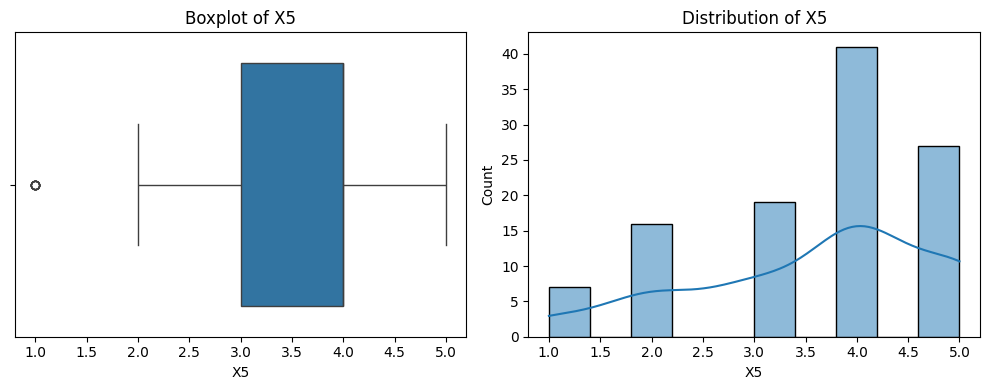

In [31]:
# Summary statistics for X5 (rounded to 4 decimal places)
X5_stats = df['X5'].describe().round(4)
skewness = round(df['X5'].skew(), 4)
kurtosis = round(df['X5'].kurtosis(), 4)

print("Statistics for 'X5' column:")
print(X5_stats)
print(f"\nSkewness of 'X5': {skewness}")
print(f"Kurtosis of 'X5': {kurtosis}")

# Calculate Q1 (25th percentile) and Q3 (75th percentile)
Q1 = df['X5'].quantile(0.25)
Q3 = df['X5'].quantile(0.75)
IQR = Q3 - Q1

# Determine outlier boundaries
lower_bound = Q1 - 1.5 * IQR
upper_bound = Q3 + 1.5 * IQR

# Identify outliers in X5
outliers = df[(df['X5'] < lower_bound) | (df['X5'] > upper_bound)]

# Calculate the number and percentage of outliers
number_outliers = len(outliers)
percentage_outliers = (len(outliers) / len(df)) * 100

# Print number and percentage of outliers
print(f"\nNumber of Outliers: {number_outliers}")
print(f"Percentage of Outliers: {percentage_outliers:.2f}%")

# Set up side-by-side plots
fig, axes = plt.subplots(1, 2, figsize=(10, 4))

# Boxplot for 'X5' column
sns.boxplot(x=df['X5'], ax=axes[0])
axes[0].set_title("Boxplot of X5")

# Histogram for 'X5' column
sns.histplot(df['X5'], kde=True, ax=axes[1])
axes[1].set_title("Distribution of X5")

plt.tight_layout()
plt.show()

#### From the results above, X5 has 110 data points which ranges from 1 to 5 where 25% is 3 and 50%/75% is 4. It is approximately normally distributed, it has 7 outliers, mean and standard deviation values of 3.5909 and 1.1909 respectively.

##### Codes below handle the outliers in X5 using winsorization method.

In [19]:
df['X5'] = winsorize(df['X5'], limits=[0.10, 0.10]).data

##### Codes below  examine the effect of winsorization on X5.

Statistics for 'X5' column:
count    110.0000
mean       3.6545
std        1.0703
min        2.0000
25%        3.0000
50%        4.0000
75%        4.0000
max        5.0000
Name: X5, dtype: float64

Skewness of 'X5': -0.3205
Kurtosis of 'X5': -1.1278

Number of Outliers: 0
Percentage of Outliers: 0.00%


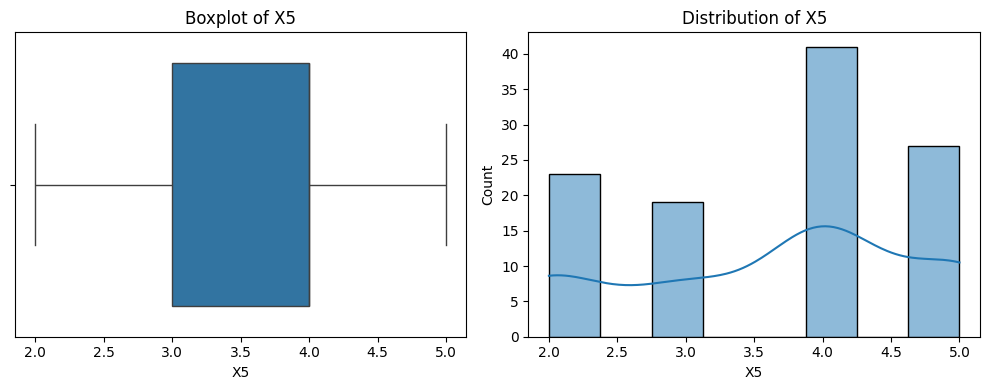

In [21]:
# Summary statistics for X5 (rounded to 4 decimal places)
X5_stats = df['X5'].describe().round(4)
skewness = round(df['X5'].skew(), 4)
kurtosis = round(df['X5'].kurtosis(), 4)

print("Statistics for 'X5' column:")
print(X5_stats)
print(f"\nSkewness of 'X5': {skewness}")
print(f"Kurtosis of 'X5': {kurtosis}")

# Calculate Q1 (25th percentile) and Q3 (75th percentile)
Q1 = df['X5'].quantile(0.25)
Q3 = df['X5'].quantile(0.75)
IQR = Q3 - Q1

# Determine outlier boundaries
lower_bound = Q1 - 1.5 * IQR
upper_bound = Q3 + 1.5 * IQR

# Identify outliers in X5
outliers = df[(df['X5'] < lower_bound) | (df['X5'] > upper_bound)]

# Calculate the number and percentage of outliers
number_outliers = len(outliers)
percentage_outliers = (len(outliers) / len(df)) * 100

# Print number and percentage of outliers
print(f"\nNumber of Outliers: {number_outliers}")
print(f"Percentage of Outliers: {percentage_outliers:.2f}%")

# Set up side-by-side plots
fig, axes = plt.subplots(1, 2, figsize=(10, 4))

# Boxplot for 'X5' column
sns.boxplot(x=df['X5'], ax=axes[0])
axes[0].set_title("Boxplot of X5")

# Histogram for 'X5' column
sns.histplot(df['X5'], kde=True, ax=axes[1])
axes[1].set_title("Distribution of X5")

plt.tight_layout()
plt.show()

#### From the result above, outliers has reduced from 7 to 0(no more outliers) after winsorization.

##### Codes below standardize X5 using Z-score method.

In [43]:
scaler = StandardScaler()

# Standardize X5 in place
df['X5'] = scaler.fit_transform(df[['X5']])

##### Codes below display X5 statistics again after standardization.

In [45]:
X5_stats = df['X5'].describe().round(4)
skewness = round(df['X5'].skew(), 4)
kurtosis = round(df['X5'].kurtosis(), 4)

print("Statistics for 'X5' column:")
print(X5_stats)

Statistics for 'X5' column:
count    110.0000
mean      -0.0000
std        1.0046
min       -1.5529
25%       -0.6143
50%        0.3242
75%        0.3242
max        1.2628
Name: X5, dtype: float64


#### From the result above, the mean and standard deviation value have been set to -0 and 1 respectively as expected.

### X6 Column analysis.

##### Codes below examine X6 column for missing values.

In [49]:
df["X6"].isna().sum()

np.int64(0)

#### From the result above, X6 has no miss value.

##### Codes below examine X6 for the following:
##### statistics
##### presence of outliers
##### skewness and kurtosis.
##### its distribution using box plot and histogram.

Statistics for 'X6' column:
count    110.0000
mean       4.2091
std        0.8361
min        1.0000
25%        4.0000
50%        4.0000
75%        5.0000
max        5.0000
Name: X6, dtype: float64

Skewness of 'X6': -0.8922
Kurtosis of 'X6': 0.7143

Number of Outliers: 2
Percentage of Outliers: 1.82%


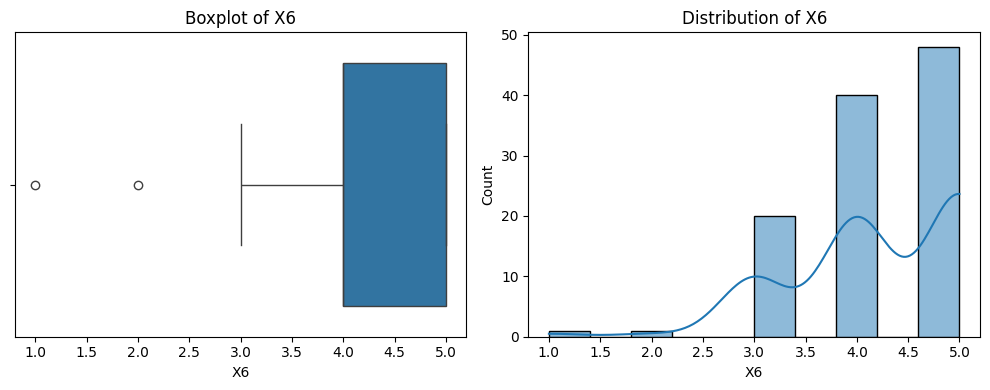

In [51]:
# Summary statistics for X6 (rounded to 4 decimal places)
X6_stats = df['X6'].describe().round(4)
skewness = round(df['X6'].skew(), 4)
kurtosis = round(df['X6'].kurtosis(), 4)

print("Statistics for 'X6' column:")
print(X6_stats)
print(f"\nSkewness of 'X6': {skewness}")
print(f"Kurtosis of 'X6': {kurtosis}")

# Calculate Q1 (25th percentile) and Q3 (75th percentile)
Q1 = df['X6'].quantile(0.25)
Q3 = df['X6'].quantile(0.75)
IQR = Q3 - Q1

# Determine outlier boundaries
lower_bound = Q1 - 1.5 * IQR
upper_bound = Q3 + 1.5 * IQR

# Identify outliers in X6
outliers = df[(df['X6'] < lower_bound) | (df['X6'] > upper_bound)]

# Calculate the number and percentage of outliers
number_outliers = len(outliers)
percentage_outliers = (len(outliers) / len(df)) * 100

# Print number and percentage of outliers
print(f"\nNumber of Outliers: {number_outliers}")
print(f"Percentage of Outliers: {percentage_outliers:.2f}%")

# Set up side-by-side plots
fig, axes = plt.subplots(1, 2, figsize=(10, 4))

# Boxplot for 'X6' column
sns.boxplot(x=df['X6'], ax=axes[0])
axes[0].set_title("Boxplot of X6")

# Histogram for 'X6' column
sns.histplot(df['X6'], kde=True, ax=axes[1])
axes[1].set_title("Distribution of X6")

plt.tight_layout()
plt.show()

#### From the results above, X6 has 110 data points which ranges from 1 to 5 where 25%/50% is 4 and 75% is 5. It is approximately normally distributed, it has 2 outliers, mean and standard deviation values of 4.2091 and 0.8361 respectively.

##### Codes below handle outliers in the X6 using winsorization method.

In [23]:
df['X6'] = winsorize(df['X6'], limits=[0.05, 0.05]).data

##### Codes below  examine the effect of the winsorization on X6.

Statistics for 'X6' column:
count    110.0000
mean       4.2364
std        0.7654
min        3.0000
25%        4.0000
50%        4.0000
75%        5.0000
max        5.0000
Name: X6, dtype: float64

Skewness of 'X6': -0.432
Kurtosis of 'X6': -1.1678

Number of Outliers: 0
Percentage of Outliers: 0.00%


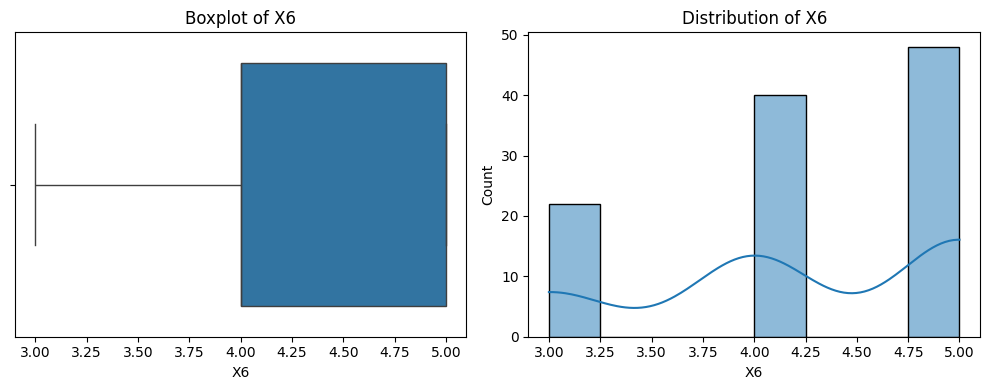

In [25]:
# Summary statistics for X6 (rounded to 4 decimal places)
X6_stats = df['X6'].describe().round(4)
skewness = round(df['X6'].skew(), 4)
kurtosis = round(df['X6'].kurtosis(), 4)

print("Statistics for 'X6' column:")
print(X6_stats)
print(f"\nSkewness of 'X6': {skewness}")
print(f"Kurtosis of 'X6': {kurtosis}")

# Calculate Q1 (25th percentile) and Q3 (75th percentile)
Q1 = df['X6'].quantile(0.25)
Q3 = df['X6'].quantile(0.75)
IQR = Q3 - Q1

# Determine outlier boundaries
lower_bound = Q1 - 1.5 * IQR
upper_bound = Q3 + 1.5 * IQR

# Identify outliers in X6
outliers = df[(df['X6'] < lower_bound) | (df['X6'] > upper_bound)]

# Calculate the number and percentage of outliers
number_outliers = len(outliers)
percentage_outliers = (len(outliers) / len(df)) * 100

# Print number and percentage of outliers
print(f"\nNumber of Outliers: {number_outliers}")
print(f"Percentage of Outliers: {percentage_outliers:.2f}%")

# Set up side-by-side plots
fig, axes = plt.subplots(1, 2, figsize=(10, 4))

# Boxplot for 'X6' column
sns.boxplot(x=df['X6'], ax=axes[0])
axes[0].set_title("Boxplot of X6")

# Histogram for 'X6' column
sns.histplot(df['X6'], kde=True, ax=axes[1])
axes[1].set_title("Distribution of X6")

plt.tight_layout()
plt.show()

#### From the result above, outliers reduced from 2 to 0(no outliers) after winsirization.

##### Codes below standardize X6  using z-score

In [59]:

scaler = StandardScaler()

# Standardize X6 in place
df['X6'] = scaler.fit_transform(df[['X6']])

##### Code below display X6 statistics again after standardization.

In [61]:
X6_stats = df['X6'].describe().round(4)
skewness = round(df['X6'].skew(), 4)
kurtosis = round(df['X6'].kurtosis(), 4)

print("Statistics for 'X6' column:")
print(X6_stats)

Statistics for 'X6' column:
count    110.0000
mean       0.0000
std        1.0046
min       -1.6227
25%       -0.3102
50%       -0.3102
75%        1.0023
max        1.0023
Name: X6, dtype: float64


#### From the result above, the mean and standard deviation values have been set to 0 and 1 respectively as expected.

### Examine the Leanear Relationship among the Variables.
##### Codes below calculate correlation coefficients of the variables and display them using a heatmap. 

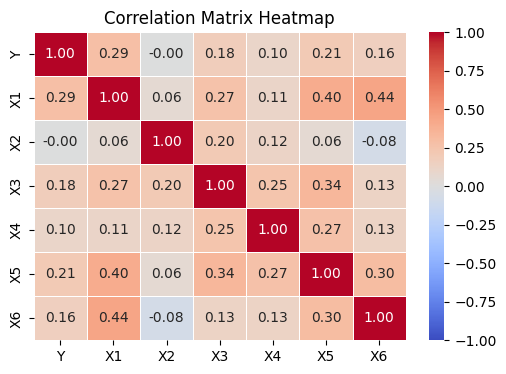

In [71]:
# Calculate the correlation matrix
corr_matrix = df.corr()

# Set up the figure size and heatmap styling
plt.figure(figsize=(6, 4))
sns.heatmap(corr_matrix, annot=True, fmt=".2f", cmap="coolwarm", vmin=-1, vmax=1, linewidths=0.5)

# Add titles and labels
plt.title("Correlation Matrix Heatmap")
plt.show()

#### From the heatmap above, no variables are strongly related to each other. so, all of them were kept for model development.

### Target Variable (column Y) Analysis.

##### Codes below examine Y distinct values

In [73]:
unique_values = df['Y'].unique()
print( f"Distinct values are:")
print(unique_values)

Distinct values are:
[0. 1.]


#### From the result above Y has 0s and 1s as expected.

##### Codes below examine Y distribution using a histogram.

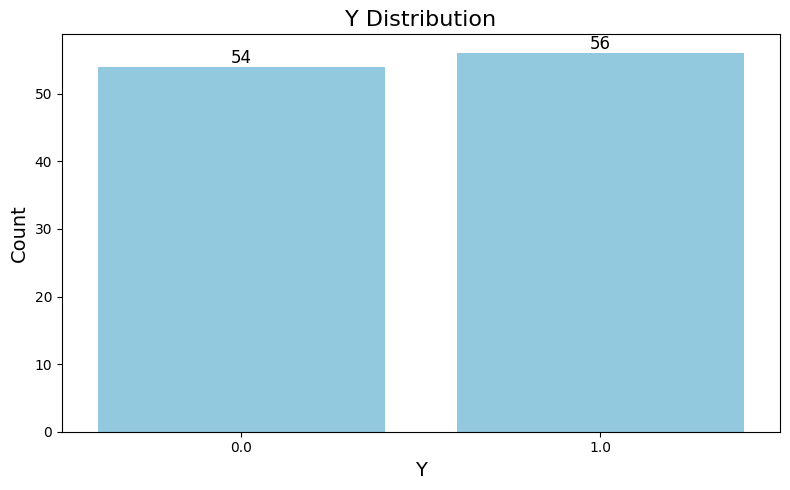

In [75]:
plt.figure(figsize=(8, 5))  # Set figure size
ax = sns.countplot(data=df, x='Y', color='skyblue') 

# Annotate each bar with the count
for p in ax.patches:
    ax.annotate(f'{int(p.get_height())}',  
                (p.get_x() + p.get_width() / 2., p.get_height()), 
                ha='center', va='bottom',  # Center alignment
                fontsize=12)  # Font size for the annotations

# Add titles and labels
plt.title("Y Distribution", fontsize=16)
plt.xlabel("Y", fontsize=14)
plt.ylabel("Count", fontsize=14)

# Show the plot
plt.tight_layout()  
plt.show()

#### From the result above, Y is a balanced data. 0s = 54 while 1s = 56.

### Next Step.
#### Having carried out EDAs and applied the necessary transformations, a pipeline that will automate the steps will be developed.